# Case Study 2 - Analyzing Fuel Economy Data

## 1. Assessing Data

Using pandas to explore ```all_alpha_08.csv``` and ```all_alpha_18.csv``` to answer the following questions about the characteristics of the datasets:

- number of samples in each dataset
- number of columns in each dataset
- duplicate rows in each dataset
- datatypes of columns
- features with missing values
- number of non-null unique values for features in each dataset
- what those unique values are and counts for each
- Number of rows with missing values in each dataset
- Types of fuels present in each dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

df_08 = pd.read_csv('all_alpha_08.csv')
df_18 = pd.read_csv('all_alpha_18.csv')

### Number of samples & columns in the fuel economy 2008 dataset

In [2]:
print(df_08.shape)
df_08.head()

(2404, 18)


,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


### Number of samples & columns in the fuel economy 2018 dataset

In [3]:
print(df_18.shape)
df_18.head()

(1611, 18)


,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


### Duplicate rows in the fuel economy 2008 dataset

In [4]:
df_08.duplicated().sum()

25

### Duplicate rows in the fuel economy 2018 dataset

In [5]:
df_18.duplicated().sum()

0

### Datatype of column in the fuel economy 2008 dataset

In [6]:
df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
Model                   2404 non-null object
Displ                   2404 non-null float64
Cyl                     2205 non-null object
Trans                   2205 non-null object
Drive                   2311 non-null object
Fuel                    2404 non-null object
Sales Area              2404 non-null object
Stnd                    2404 non-null object
Underhood ID            2404 non-null object
Veh Class               2404 non-null object
Air Pollution Score     2404 non-null object
FE Calc Appr            2205 non-null object
City MPG                2205 non-null object
Hwy MPG                 2205 non-null object
Cmb MPG                 2205 non-null object
Unadj Cmb MPG           2205 non-null float64
Greenhouse Gas Score    2205 non-null object
SmartWay                2404 non-null object
dtypes: float64(2), object(16)
memory usage: 338.1+ KB


### Datatype of column in the fuel economy 2018 dataset

In [7]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 18 columns):
Model                   1611 non-null object
Displ                   1609 non-null float64
Cyl                     1609 non-null float64
Trans                   1611 non-null object
Drive                   1611 non-null object
Fuel                    1611 non-null object
Cert Region             1611 non-null object
Stnd                    1611 non-null object
Stnd Description        1611 non-null object
Underhood ID            1611 non-null object
Veh Class               1611 non-null object
Air Pollution Score     1611 non-null int64
City MPG                1611 non-null object
Hwy MPG                 1611 non-null object
Cmb MPG                 1611 non-null object
Greenhouse Gas Score    1611 non-null int64
SmartWay                1611 non-null object
Comb CO2                1611 non-null object
dtypes: float64(2), int64(2), object(14)
memory usage: 226.6+ KB


> Noticed that the following features have different datatype in 2008 and 2018:
> - Cyl (2018) - float
> - Cyl (2008) - string
> - Greenhouse Gas Score (2008) - string
> - Greenhouse Gas Score (2018) - int

### Features with missing values in the fuel economy 2008 dataset

In [8]:
df_08.isnull().sum()

Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64

### Features with missing values in the fuel economy 2018 dataset

In [9]:
df_18.isnull().sum()

Model                   0
Displ                   2
Cyl                     2
Trans                   0
Drive                   0
Fuel                    0
Cert Region             0
Stnd                    0
Stnd Description        0
Underhood ID            0
Veh Class               0
Air Pollution Score     0
City MPG                0
Hwy MPG                 0
Cmb MPG                 0
Greenhouse Gas Score    0
SmartWay                0
Comb CO2                0
dtype: int64

### Number of unique values for quality in fuel economy 2008 dataset

In [10]:
df_08.nunique()

Model                   436
Displ                    47
Cyl                       8
Trans                    14
Drive                     2
Fuel                      5
Sales Area                3
Stnd                     12
Underhood ID            343
Veh Class                 9
Air Pollution Score      13
FE Calc Appr              2
City MPG                 39
Hwy MPG                  43
Cmb MPG                  38
Unadj Cmb MPG           721
Greenhouse Gas Score     20
SmartWay                  2
dtype: int64

### Number of unique values for quality in fuel economy 2018 dataset

In [11]:
df_18.nunique()

Model                   367
Displ                    36
Cyl                       7
Trans                    26
Drive                     2
Fuel                      5
Cert Region               2
Stnd                     19
Stnd Description         19
Underhood ID            230
Veh Class                 9
Air Pollution Score       6
City MPG                 58
Hwy MPG                  62
Cmb MPG                  57
Greenhouse Gas Score     10
SmartWay                  3
Comb CO2                299
dtype: int64

### Number of rows with missing values in fuel economy 2008 dataset

In [12]:
df_08.isnull().any(axis=1).sum()

199

### Number of rows with missing values in fuel economy 2018 dataset

In [13]:
df_18.isnull().any(axis=1).sum()

2

### Types of fuels present in 2008 dataset

In [14]:
df_08.Fuel.unique()

array(['Gasoline', 'ethanol/gas', 'ethanol', 'diesel', 'CNG'],
      dtype=object)

### Types of fuels present in 2018 dataset

In [15]:
df_18.Fuel.unique()

array(['Gasoline', 'Gasoline/Electricity', 'Diesel', 'Ethanol/Gas',
       'Electricity'], dtype=object)

## 2. Cleaning Column Labels

In [16]:
# view 2008 dataset
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no


In [17]:
# view 2018 dataset
df_18.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386


### Drop Extraneous Columns

Drop features that aren't consistent (not present in both datasets) or aren't relevant to our questions.

Columns to Drop:
- From 2008 dataset: ```'Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'```
- From 2018 dataset: ```'Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'```

In [18]:
# drop columns from 2008 dataset
df_08.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis=1, inplace=True)

# confirm changes
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [19]:
# drop columns from 2018 dataset
df_18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], axis=1, inplace=True)

# confirm changes
df_18.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


### Rename Columns

Change the "Sales Area" column label in the 2008 dataset to "Cert Region" for consistency.
Rename all column labels to replace spaces with underscores and convert everything to lowercase.

In [20]:
# rename Sales Area to Cert Region
df_08.rename(columns={'Sales Area': 'Cert Region'}, inplace=True)

# confirm changes
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [21]:
# replace spaces with underscores and lowercase labels for 2008 dataset
df_08.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# confirm changes
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [22]:
# replace spaces with underscores and lowercase labels for 2018 dataset
df_18.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# confirm changes
df_18.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


In [23]:
# confirm column labels for 2008 and 2018 datasets are identical
df_08.columns == df_18.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [24]:
# make sure they're all identical like this
(df_08.columns == df_18.columns).all()

True

In [25]:
# save new datasets for next section
df_08.to_csv('data_08.csv', index=False)
df_18.to_csv('data_18.csv', index=False)

## 3. Filter, Drop Nulls, Dedupe

In [26]:
# view dimensions of dataset
df_08.shape

(2404, 14)

In [27]:
# view dimensions of dataset
df_18.shape

(1611, 14)

### Filter by Certification Region

In [28]:
# filter datasets for rows following California standards
df_08 = df_08.query('cert_region == "CA"')
df_18 = df_18.query('cert_region == "CA"')

In [29]:
# confirm only certification region is California
df_08['cert_region'].unique()

array(['CA'], dtype=object)

In [30]:
# confirm only certification region is California
df_18['cert_region'].unique()

array(['CA'], dtype=object)

In [31]:
# drop certification region columns form both datasets

df_08.drop('cert_region', axis=1, inplace=True)
df_18.drop('cert_region', axis=1, inplace=True)

In [32]:
df_08.shape

(1084, 13)

In [33]:
df_18.shape

(798, 13)

### Drop Rows with Missing Values

In [34]:
# view missing value count for each feature in 2008
df_08.isnull().sum()

model                    0
displ                    0
cyl                     75
trans                   75
drive                   37
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                75
hwy_mpg                 75
cmb_mpg                 75
greenhouse_gas_score    75
smartway                 0
dtype: int64

In [35]:
# view missing value count for each feature in 2018
df_18.isnull().sum()

model                   0
displ                   1
cyl                     1
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [36]:
# drop rows with any null values in both datasets
df_08.dropna(inplace=True)
df_18.dropna(inplace=True)

In [37]:
# checks if any of columns in 2008 have null values - should print False
df_08.isnull().sum().any()

False

In [38]:
# checks if any of columns in 2018 have null values - should print False
df_18.isnull().sum().any()

False

### Dedupe Data

In [39]:
# print number of duplicates in 2008 datasets
df_08.duplicated().sum()

23

In [40]:
# print number of duplicates in 2018 datasets
df_18.duplicated().sum()

3

In [41]:
# drop duplicates in 2008 datasets
df_08.drop_duplicates(inplace=True)

In [42]:
# drop duplicates in 2018 datasets
df_18.drop_duplicates(inplace=True)

In [43]:
# print number of duplicates again to confirm dedupe - should be 0
df_08.duplicated().sum()

0

In [44]:
# print number of duplicates again to confirm dedupe - should be 0
df_18.duplicated().sum()

0

In [45]:
# save progress for the next section
df_08.to_csv('data_08.csv', index=False)
df_18.to_csv('data_18.csv', index=False)

# 4. Inspecting Data Types

Use the following Jupyter Notebook to inspect the datatypes of features in each dataset and think about what changes should be made to make them practical and consistent (in both datasets).

In [46]:
df_08 = pd.read_csv('data_08.csv')
df_18 = pd.read_csv('data_18.csv')

In [47]:
# Datatype of column in the fuel economy 2008 dataset
df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 13 columns):
model                   986 non-null object
displ                   986 non-null float64
cyl                     986 non-null object
trans                   986 non-null object
drive                   986 non-null object
fuel                    986 non-null object
veh_class               986 non-null object
air_pollution_score     986 non-null object
city_mpg                986 non-null object
hwy_mpg                 986 non-null object
cmb_mpg                 986 non-null object
greenhouse_gas_score    986 non-null object
smartway                986 non-null object
dtypes: float64(1), object(12)
memory usage: 100.2+ KB


In [48]:
# Datatype of column in the fuel economy 2018 dataset
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 13 columns):
model                   794 non-null object
displ                   794 non-null float64
cyl                     794 non-null float64
trans                   794 non-null object
drive                   794 non-null object
fuel                    794 non-null object
veh_class               794 non-null object
air_pollution_score     794 non-null int64
city_mpg                794 non-null object
hwy_mpg                 794 non-null object
cmb_mpg                 794 non-null object
greenhouse_gas_score    794 non-null int64
smartway                794 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 80.7+ KB


In [49]:
# View first row of data in the fuel economy 2008 dataset
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no


In [50]:
# View first row of data in the fuel economy 2018 dataset
df_18.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,small SUV,3,20,28,23,5,No


> 1) Need to extract int values from the strings in the 2008 ```cyl``` column and convert floats to ints in the 2018 >```cyl``` column to make the ```cyl``` column in both dataset clear and consistent.

>2) For ```air_pollution_score``` column: Need to convert strings to floats in the 2008 column and convert ints to floats in >the 2018 columns.

>3) The following features need to be convereted to floats from strings for both dataset:
> - city_mpg
> - hwy_mpg
> - cmb_mpg

>4) Need to convert string to ints in the 2008 column to make the ```greenhouse_gas_score``` columns in both datasets >consistent.
 

# 5. Fixing Data Types

Make the following changes to make the datatypes consistent and practical to work with:

### 1) Fix ```cyl``` datatype
- 2008: extract int from string.
- 2018: convert float to int.

In [51]:
# check value counts for the 2008 cyl column
df_08['cyl'].value_counts()

(6 cyl)     409
(4 cyl)     283
(8 cyl)     199
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: cyl, dtype: int64

In [52]:
# Extract int from strings in the 2008 cyl column

# str.extract() takes the string data and extracts the argument passed within
# \d refers to characters which are digits
# + matches one or more characters
# astype(int) then converts it to an integer

df_08['cyl'] = df_08['cyl'].str.extract('(\d+)').astype(int)

C:\Users\Emily\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [53]:
# Check value counts for 2008 cyl column again to confirm the change
df_08['cyl'].value_counts()

6     409
4     283
8     199
5      48
12     30
10     14
2       2
16      1
Name: cyl, dtype: int64

In [54]:
# convert 2018 cyl column to int
df_18['cyl'] = df_18['cyl'].astype(int)

In [55]:
# Check value counts for 2018 cyl column again to confirm the change
df_18['cyl'].value_counts()

4     365
6     246
8     153
3      18
12      9
5       2
16      1
Name: cyl, dtype: int64

In [56]:
df_08.to_csv('data_08.csv', index=False)
df_18.to_csv('data_18.csv', index=False)

### 2) Fix ```air_pollution_score``` datatype
- 2008: convert string to float.
- 2018: convert int to float.

In [57]:
# try using Pandas to_numeric or astype function to convert the
# 2008 air_pollution_score column to float -- this won't work
df_08.air_pollution_score = df_08.air_pollution_score.astype(float)

ValueError: could not convert string to float: '6/4'

> The above did not work. According to the error above, there is error with the value "6/4" - let's check it out.

In [ ]:
# To find out the position for the value - "6/4"

error_position = df_08.query('air_pollution_score == "6/4"')
print(error_position)

> According to the error above and position, the value at row 582 is "6/4".

In [ ]:
# Figuring out the issue
df_08.iloc[582]

> According to [this link](http://www.fueleconomy.gov/feg/findacarhelp.shtml#airPollutionScore), which I found from the PDF documentation:

>    "If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."
    
>So all vehicles with more than one fuel type, or hybrids, like the one above (it uses ethanol AND gas) will have a string that holds two values - one for each.

In [ ]:
# First, let's get all the hybrids in 2008
hb_08 = df_08[df_08['fuel'].str.contains('/')]
hb_08

In [ ]:
# hybrids in 2018
hb_18 = df_18[df_18['fuel'].str.contains('/')]
hb_18

> Take each hybrid row and split them into two new rows - one with values for the first fuel type (values before the "/"), and the other with values for the second fuel type (values after the "/").

In [ ]:
# create two copies of the 2008 hybrids dataframe
df1 = hb_08.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_08.copy()  # data on second fuel type of each hybrid vehicle

# Each one should look like this
df1

In [ ]:
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [ ]:
# this dataframe holds info for the FIRST fuel type of the hybrid
# aka the values before the "/"s
df1

In [ ]:
# this dataframe holds info for the SECOND fuel type of the hybrid
# aka the values before the "/"s
df2

In [ ]:
# combine dataframes to add to the original dataframe
new_rows = df1.append(df2)

# now we have separate rows for each fuel type of each vehicle!
new_rows

In [ ]:
# drop the original hybrid rows
df_08.drop(hb_08.index, inplace=True)

# add in our newly separated rows
df_08 = df_08.append(new_rows, ignore_index=True)

In [ ]:
# check that all the original hybrid rows with "/"s are gone
df_08[df_08['fuel'].str.contains('/')]

In [ ]:
df_08.shape

### Repeat process for the 2018 dataset

In [ ]:
# create two copies of the 2018 hybrids dataframe, hb_18
df1 = hb_18.copy()
df2 = hb_18.copy()

### Split values for `fuel`, `city_mpg`, `hwy_mpg`, `cmb_mpg`
not required for `air_pollution_score` or `greenhouse_gas_score` here because these columns are already ints in the 2018 dataset.

In [ ]:
# list of columns to split
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [ ]:
# append the two dataframes
new_rows = df1.append(df2)

# drop each hybrid row from the original 2018 dataframe
# do this by using Pandas drop function with hb_18's index
df_18.drop(hb_18.index, inplace=True)

# append new_rows to df_18
df_18 = df_18.append(new_rows, ignore_index=True)

In [ ]:
# check that they're gone
df_18[df_18['fuel'].str.contains('/')]

In [ ]:
df_18.shape

### Continue the changes needed for `air_pollution_score`:
- 2008: convert string to float
- 2018: convert int to float

In [ ]:
# convert string to float for 2008 air pollution column
df_08.air_pollution_score = df_08.air_pollution_score.astype(float)

In [ ]:
# convert int to float for 2018 air pollution column
df_18.air_pollution_score = df_18.air_pollution_score.astype(float)

In [ ]:
df_08.to_csv('data_08.csv', index=False)
df_18.to_csv('data_18.csv', index=False)

### 3) Fix ```city_mpg```, ```hwy_mpg```, ```cmb_mpg``` datatypes
- 2008 and 2018: convert string to float.

In [ ]:
# convert mpg columns to floats
mpg_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']
for c in mpg_columns:
    df_18[c] = df_18[c].astype(float)
    df_08[c] = df_08[c].astype(float)

### 4) Fix ```greenhouse_gas_score``` datatype
- 2008: convert from float to int.

In [ ]:
# convert from float to int
df_08['greenhouse_gas_score'] = df_08['greenhouse_gas_score'].astype(int)

### Check to make sure all datatype are fixed

In [ ]:
df_08.dtypes

In [ ]:
df_18.dtypes

In [ ]:
df_08.dtypes == df_18.dtypes

In [ ]:
# Save your new CLEAN datasets as new files!
df_08.to_csv('clean_08.csv', index=False)
df_18.to_csv('clean_18.csv', index=False)

# 6. Exploring with Visuals

Use histograms and scatterplots to explore clean_08.csv and clean_18.csv in the Jupyter notebook. 

In [58]:
df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')

### Compare the distributions of greenhouse gas score in 2008 and 2018.

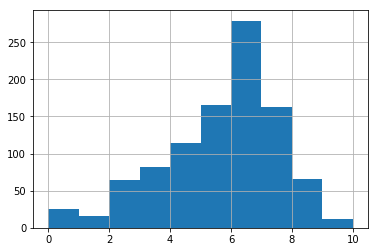

In [59]:
df_08['greenhouse_gas_score'].hist();

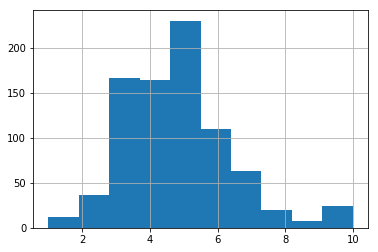

In [60]:
df_18['greenhouse_gas_score'].hist();

> Distribution for 2008 is more skewed to the left.

### How has the distribution of combined mpg changed from 2008 to 2018?

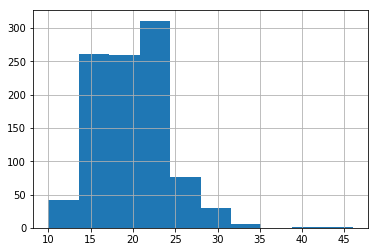

In [61]:
df_08['cmb_mpg'].hist();

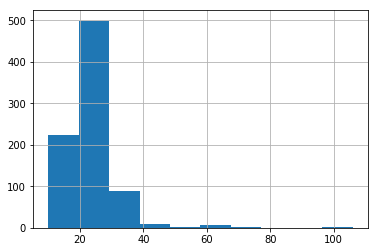

In [62]:
df_18['cmb_mpg'].hist();

> Became much more skewed to the right

### Describe the correlation between displacement and combined mpg.

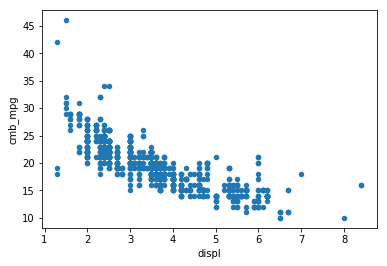

In [63]:
df_08.plot(x='displ', y='cmb_mpg', kind='scatter');

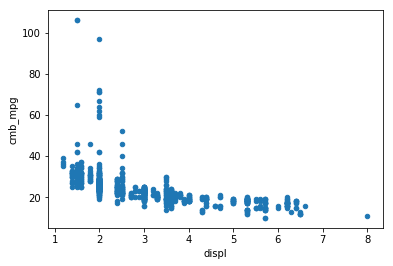

In [64]:
df_18.plot(x='displ', y='cmb_mpg', kind='scatter');

> Negative correlation

### Describe the correlation between greenhouse gas score and combined mpg.

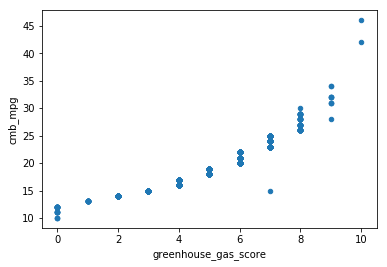

In [65]:
df_08.plot(x='greenhouse_gas_score', y='cmb_mpg', kind='scatter');

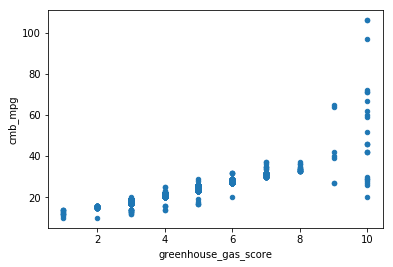

In [66]:
df_18.plot(x='greenhouse_gas_score', y='cmb_mpg', kind='scatter');

> Positive correlation